# Symbolic maths: Sympy

*Davide Gerosa (Milano-Bicocca)*

**Sources**: Michael Zingale at Stony Brook University: https://sbu-python-class.github.io

SymPy provides support for symbolic math to python, similar to what you would do with Mathematica or Maple.  The major difference is that it acts just like any other python module, so you can use the symbolic math together in your own python projects with the rest of python functionality. Like python is open source, while Mathematica is proprietary (that said, Mathematica remains more powerful IMO).

The following import and function (`init_session()`) sets up a nice environment for us when working in Jupyter

In [1]:
from sympy import *
#init_session(use_latex="mathjax")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Sympy types and basic symbolic manipulation

Sympy defines its own types, you can convert them to python types, but you don't always want to (and will probably lose accuracy when you do).  

In [3]:
print(sqrt(2))

sqrt(2)


In [4]:
print(sqrt(8))

2*sqrt(2)


In [5]:
print(2**0.5)

1.4142135623730951


In [6]:
#help(sqrt(8))

We can do symbolic math not just on numbers, but we can tell sympy what to treat as a symbol, using `symbols()`

In [7]:
from sympy import symbols
x, y, z = symbols("x y z")

In [8]:
expr = x + 2*y
expr

x + 2⋅y

In [9]:
expr - 1

x + 2⋅y - 1

In [10]:
expr - y

x + y

In [11]:
f = x*expr
f

x⋅(x + 2⋅y)

In [12]:
g = expand(f)
g

 2        
x  + 2⋅x⋅y

In [13]:
factor(g)

x⋅(x + 2⋅y)

## Substitution

Sympy provides methods to substitute values for symbols in symbolic expressions.  Note, the follow likely does not do what you expect:

In [14]:
w = symbols("w")
expr = sin(w*2*pi)
w = 0
expr

sin(2⋅π⋅w)

We've now redefined `z` to be a python type

In [15]:
type(w)

int

To do substitution, we use the `subs()` method (that's like doing `./` in Mathematica)

In [16]:
expr = sin(x*2*pi)
expr

sin(2⋅π⋅x)

In [17]:
a = expr.subs(x, 0.125)
a

√2
──
2 

Note that this is not a floating point number -- it is still a sympy object.  To make it floating point, we can use evalf()

In [18]:
b = a.evalf()
print(b, type(b))

0.707106781186548 <class 'sympy.core.numbers.Float'>


This is still a sympy object, because sympy can do arbitrary precision 

In [19]:
a.evalf(50)

0.70710678118654752440084436210484903928483593768847

Want regular python types?

In [20]:
c = float(b)
print(c, type(c))

0.7071067811865476 <class 'float'>


## Python and sympy

In [21]:
x, y, z, t = symbols('x y z t')

Sympy symbols are just objects and when you do operations on two sympy objects the result is a sympy object.  

When you combine a sympy and python object, the result is also a sympy object.  

But we need to be careful when doing fractions.  For instance doing `x + 1/3` will first compute `1/3` in python (giving `0.333...`) and then add it to the sympy `x` symbol.  The `Rational()` function makes this all happen in sympy

In [22]:
f = expr + Rational(1,3)
f

sin(2⋅π⋅x) + 1/3

In [23]:
expr + 1/3

sin(2⋅π⋅x) + 0.333333333333333

## Equality

`=` is still the assignment operator of python (it does not mean symbolic equality), and `==` is still the logical test (exact structural equality).  There is a separate object, `Eq()` to specify symbolic equality.

And testing for _algebraic_ equality is not always accomplished using `==`, since that tests for _structural equality_.

In [24]:
x + 1 == 4

False

In [25]:
Eq(x + 1, 4)

x + 1 = 4

In [33]:
a = (x + 1)**2
b = x**2 + 2*x + 1    # these are algebraically equal

In [34]:
a == b

False

In [35]:
Eq(a,b) # That's not enough...

       2    2          
(x + 1)  = x  + 2⋅x + 1

We can use `simplify()` to test for algebraic equality

In [36]:
simplify(a - b)

0

In [37]:
a = cos(x) + I*sin(x)
a

ⅈ⋅sin(x) + cos(x)

In [38]:
simplify(a)

 ⅈ⋅x
ℯ   

## More substitution

Note that substitution returns a new expression, that's because sympy expressions are immutable

In [39]:
expr = cos(x)
expr.subs(x, 0)

1

In [40]:
expr

cos(x)

In [41]:
x

x

For multiple substitutions, pass a list of tuples

In [42]:
expr = x**3 + 4*x*y - z
expr

 3            
x  + 4⋅x⋅y - z

In [43]:
expr.subs([(x, 2), (y, 4), (z, 0)])

40

## Simplifying

There is not unique definition of what the simplest form of an expression is.

`simplify()` tries lots of methods for simplification (check the docs for details)

In [44]:
simplify(sin(x)**2 + cos(x)**2)

1

In [45]:
simplify( (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1) )

x - 1

In [46]:
simplify(gamma(x)/gamma(x - 2))

(x - 2)⋅(x - 1)

But sometimes it doesn't have your idea of what the simplest form is

In [47]:
simplify(x**2 + 2*x + 1)

 2          
x  + 2⋅x + 1

Instead factor may be what you want (the very same thing happens in Mathematica)

In [48]:
factor(x**2 + 2*x + 1)

       2
(x + 1) 

### Polynomial simplification

In [49]:
expand((x + 1)**2)

 2          
x  + 2⋅x + 1

In [50]:
expand((x + 2)*(x - 3))

 2        
x  - x - 6

In [55]:
expand( (x + 1)*(x - 2) - (x - 1)*x)

-2

In [59]:
expr = x**2*z + 4*x*y*z + 4*y**2*z
expr

 2                  2  
x ⋅z + 4⋅x⋅y⋅z + 4⋅y ⋅z

In [60]:
factor(expr)

           2
z⋅(x + 2⋅y) 

In [61]:
factor_list(expr)

(1, [(z, 1), (x + 2⋅y, 2)])

collect collects common powers

In [62]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

 3    2        2              
x  - x ⋅z + 2⋅x  + x⋅y + x - 3

In [63]:
collected_expr = collect(expr, x)
collected_expr

 3    2                        
x  + x ⋅(2 - z) + x⋅(y + 1) - 3

Cancel cancels

In [64]:
a = (x**2 + 2*x + 1)/(x**2 + x)
a

 2          
x  + 2⋅x + 1
────────────
    2       
   x  + x   

In [65]:
cancel(a)

x + 1
─────
  x  

trigsimp simplifies trigonometric identities

In [68]:
expr = sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4
expr

   4           2       2         4   
sin (x) - 2⋅sin (x)⋅cos (x) + cos (x)

In [69]:
trigsimp(expr)

cos(4⋅x)   1
──────── + ─
   2       2

In [70]:
trigsimp(sin(x)*tan(x)/sec(x))

   2   
sin (x)

The tutorial discusses some of the nuances of simplification of powers and special functions

## Calculus

Calculus operations are simple in simpy

### Derivatives

In [28]:
diff(cos(x), x)

-sin(x)

In [29]:
diff(exp(x**2), x)

     ⎛ 2⎞
     ⎝x ⎠
2⋅x⋅ℯ    

...third derivative

In [30]:
diff(x**4, x, 3)

24⋅x

Differentiate different variables

In [31]:
expr = exp(x*y*z)
diff(expr, x, y, z)

⎛ 2  2  2              ⎞  x⋅y⋅z
⎝x ⋅y ⋅z  + 3⋅x⋅y⋅z + 1⎠⋅ℯ     

In [32]:
diff(diff(diff(expr, x),y),z)

 2  2  2  x⋅y⋅z            x⋅y⋅z    x⋅y⋅z
x ⋅y ⋅z ⋅ℯ      + 3⋅x⋅y⋅z⋅ℯ      + ℯ     

Unevaluated derivatives can be useful for building up ODEs and PDEs (which you then integrate numerically with scipy)

In [33]:
deriv = Derivative(expr, x, y, z)
deriv

    3           
   ∂    ⎛ x⋅y⋅z⎞
────────⎝ℯ     ⎠
∂z ∂y ∂x        

But of course if you can do it analytically you should

In [34]:
deriv.doit()

⎛ 2  2  2              ⎞  x⋅y⋅z
⎝x ⋅y ⋅z  + 3⋅x⋅y⋅z + 1⎠⋅ℯ     

### Integrals

Both definite and indefinite integrals are supported

In [35]:
integrate(cos(x), x)

sin(x)

Definite integral -- note the construction of the infinity

In [36]:
integrate(exp(-x), (x, 0, oo))

1

Double integral

In [37]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

π

if it is unable to do the integral, it returns an Integral object

In [38]:
expr = integrate(x**x, x)
print(expr)
expr

Integral(x**x, x)


⌠      
⎮  x   
⎮ x  dx
⌡      

This integral has a [known solution](https://en.wikipedia.org/wiki/Risch_algorithm#:~:text=8%20External%20links-,Description,(%2B%20%E2%88%92%20%C3%97%20%C3%B7) but sympy fails to find it

In [39]:
a = x / sqrt(x**4 + 10*x**2 - 96*x - 71)   # example from Wikipedia Risch algorithm page
a

             x             
───────────────────────────
   ________________________
  ╱  4       2             
╲╱  x  + 10⋅x  - 96⋅x - 71 

In [40]:
integrate(a, x)

⌠                               
⎮              x                
⎮ ─────────────────────────── dx
⎮    ________________________   
⎮   ╱  4       2                
⎮ ╲╱  x  + 10⋅x  - 96⋅x - 71    
⌡                               

This is a case where instead Mathematica can do it a quickly...
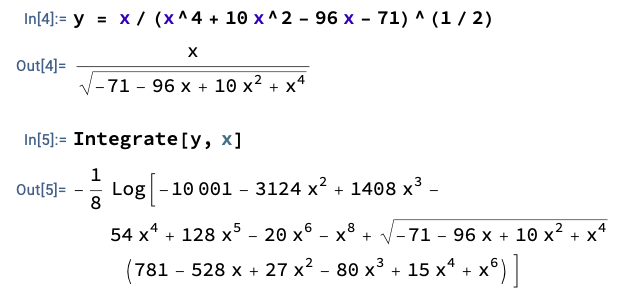

### Limits

In [88]:
limit(sin(x)/x, x, 0)

1

### Series expansions

In [89]:
expr = exp(sin(x))
a = expr.series(x, 0, 10)
a

         2    4    5     6    7       8     9          
        x    x    x     x    x    31⋅x     x      ⎛ 10⎞
1 + x + ── - ── - ── - ─── + ── + ───── + ──── + O⎝x  ⎠
        2    8    15   240   90    5760   5670         

In [90]:
c = log(x).series(x, x0=1, n=6)
c

            2          3          4          5                         
     (x - 1)    (x - 1)    (x - 1)    (x - 1)         ⎛       6       ⎞
-1 - ──────── + ──────── - ──────── + ──────── + x + O⎝(x - 1) ; x → 1⎠
        2          3          4          5                             

In [91]:
simplify(c.removeO())

 5      4       3                   
x    5⋅x    10⋅x       2         137
── - ──── + ───── - 5⋅x  + 5⋅x - ───
5     4       3                   60

## Solvers

`solveset()` is the main interface to solvers in sympy.  Note that it used to be `solve()`, but this has been replaced (see http://docs.sympy.org/latest/modules/solvers/solveset.html)

In [95]:
solveset(Eq(x**2 - x,4), x)

⎧1   √17  1   √17⎫
⎨─ - ───, ─ + ───⎬
⎩2    2   2    2 ⎭

If no Eq() is done, then it is assumed to be equal to 0

In [96]:
solveset(x**2 - x, x)

{0, 1}

You can restrict the domain of the solution (e.g. to reals).  Recall that Z is the set of integers

In [97]:
solveset(sin(x) - 1, x, domain=S.Reals)

⎧        π │      ⎫
⎨2⋅n⋅π + ─ │ n ∊ ℤ⎬
⎩        2 │      ⎭

### Linear systems

`linsolve()` is the interface to linear systems

In [102]:
linsolve([x - y + 2, x + y - 3], [x, y])

{(1/2, 5/2)}

In [103]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

{(-y - 1, y, 2)}

`roots()` will report if a solution is multiple

In [108]:
solveset(x**3 - 6*x**2 + 9*x, x)

{0, 3}

In [109]:
roots(x**3 - 6*x**2 + 9*x, x)

{0: 1, 3: 2}

0 is a single root, and 3 corresponds to two coincident roots

### Differential equations

You need an undefined function (f and g already are by our init_session() above, but we've probably reset these

In [110]:
f, g = symbols('f g', cls=Function)

In [111]:
f(x)

f(x)

In [112]:
f(x).diff(x)

d       
──(f(x))
dx      

In [114]:
diffeq = Eq(f(x).diff(x, 2) - 2*f(x).diff(x) + f(x), sin(x))

In [115]:
diffeq

                      2               
         d           d                
f(x) - 2⋅──(f(x)) + ───(f(x)) = sin(x)
         dx           2               
                    dx                

In [116]:
dsolve(diffeq, f(x))

                    x   cos(x)
f(x) = (C₁ + C₂⋅x)⋅ℯ  + ──────
                          2   

### Matrices

Consider the Euler equations of fluid dynamics:

$$q_t + A(q) q_x = 0$$

where

$$q = \left ( \begin{array}{c} \rho \\ u \\ p \end{array} \right )
\qquad
A(q) = \left ( \begin{array}{ccc} u  & \rho     & 0 \\                          
                                  0  &  u       & 1/\rho \\                     
                                  0  & c^2 \rho & u \end{array} \right ) $$



In [117]:
from sympy.abc import rho
rho, u, c = symbols('rho u c')
A = Matrix([[u, rho, 0], [0, u, rho**-1], [0, c**2 * rho, u]])
A

⎡u   ρ    0⎤
⎢          ⎥
⎢         1⎥
⎢0   u    ─⎥
⎢         ρ⎥
⎢          ⎥
⎢    2     ⎥
⎣0  c ⋅ρ  u⎦

In [118]:
A.row(0)

[u  ρ  0]

The eigenvalues of the system are the speeds at which information propagates

In [119]:
A.eigenvals()

{u: 1, -c + u: 1, c + u: 1}

You can diagonalize it, such that
$$ A = PDP^{-1}$$

In [120]:
P, D = A.diagonalize()

$D$ will be a matrix of the eigenvalues

In [121]:
D

⎡u    0       0  ⎤
⎢                ⎥
⎢0  -c + u    0  ⎥
⎢                ⎥
⎣0    0     c + u⎦

$P$ will be the matrix of right eigenvectors

In [122]:
P

⎡   1    1  ⎤
⎢1  ──   ── ⎥
⎢    2    2 ⎥
⎢   c    c  ⎥
⎢           ⎥
⎢   -1    1 ⎥
⎢0  ───  ───⎥
⎢   c⋅ρ  c⋅ρ⎥
⎢           ⎥
⎣0   1    1 ⎦

Inverse

In [123]:
A**-1

⎡1     -ρ            1      ⎤
⎢─  ─────────   ─────────── ⎥
⎢u     2    2      2      3 ⎥
⎢   - c  + u    - c ⋅u + u  ⎥
⎢                           ⎥
⎢       u           -1      ⎥
⎢0  ─────────  ─────────────⎥
⎢      2    2     2        2⎥
⎢   - c  + u   - c ⋅ρ + ρ⋅u ⎥
⎢                           ⎥
⎢       2                   ⎥
⎢     -c ⋅ρ          u      ⎥
⎢0  ─────────    ─────────  ⎥
⎢      2    2       2    2  ⎥
⎣   - c  + u     - c  + u   ⎦

## Units

Sympy can attach units to numbers and propagate them through (for the astronomers in the room, astropy also has a well-designed way of handling units)

In [124]:
from sympy.physics.units import newton, kilogram, meter, second, convert_to

In [125]:
F = 1 * kilogram * 9.81 * meter / second**2
convert_to(F, newton)

9.81⋅newton

# Exercises

In [ ]:
import sympy as sym
from sympy import init_session
init_session()

## Q1: Play with expressions

Create the expression:

$$f = x e^{-x} + x (1-x)$$

Then evaluate it for 

$$x = 0, 0.1, 0.2, 0.4, 0.8$$

In [42]:
x = symbols("x")
f = x * exp(-x) + x*(1-x)
f

               -x
x⋅(1 - x) + x⋅ℯ  

In [47]:
for i in [0, 0.1, 0.2, 0.4, 0.8]:
    print(f"Val {i}: {f.subs(x, i)}")

Val 0: 0
Val 0.1: 0.180483741803596
Val 0.2: 0.323746150615596
Val 0.4: 0.508128018414256
Val 0.8: 0.519463171293777


## Q2: Polynomials

Factor this polynomial

$$x^{4} - 6 x^{3} + x^{2} + 24 x + 16$$

Then find its zeros.

In [48]:
x = symbols("x")
f = x**4 - 6*x**3 + x**2 + 24*x + 16
f

 4      3    2            
x  - 6⋅x  + x  + 24⋅x + 16

In [52]:
factor(f)

       2        2
(x - 4) ⋅(x + 1) 

In [53]:
roots(f)

{-1: 2, 4: 2}

## Q3: There and back again 
Integrate the function:

$$f = \sin(x) e^{-x}$$

Then differentiate the result to see if you get back the original function

In [54]:
x = symbols("x")
f = sin(x) * exp(-x)
f

 -x       
ℯ  ⋅sin(x)

In [56]:
i = integrate(f)
i

   -x           -x       
  ℯ  ⋅sin(x)   ℯ  ⋅cos(x)
- ────────── - ──────────
      2            2     

In [57]:
diff(i, x)

 -x       
ℯ  ⋅sin(x)

## Q4: Parsing an expression

Write a program that reads in a mathematical expression as a string (e.g., `"sin(2*pi*x)"`), converts it to a sympy expression, and then evaluates it as needed.  

Have your program either make a plot of the entered function, or use the input function as the function to fit a dataset to using curvefit.

The following will be helpful:

`parse_expr()` will convert a string into a SymPy expression

In [4]:
from sympy.parsing.sympy_parser import parse_expr
from sympy import lambdify

In [5]:
s = "sin(2*pi*x)"
a = parse_expr(s)
a

sin(2*pi*x)

`sympy.lambdify()` will convert a sympy expression into a function that is callable by python.  You can make it a numpy-compatible function too (this means, e.g., that any `sin()` in your SymPy expression will be evaluate using `np.sin()`)

In [6]:
def evaluate(string, values):
    f = parse_expr(string)
    return lambdify(*f.free_symbols, f, "numpy")(values)

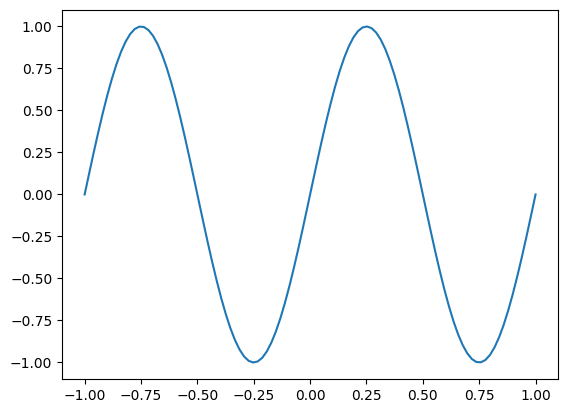

In [9]:
import matplotlib.pyplot as plt
import sympy
import numpy as np

f = "sin(2*pi*x)"

x = np.linspace(-1, 1, 100)
y = evaluate(f, x)

fig = plt.figure()
plt.plot(x, y)
plt.show()

## Q5: Let's go back to high school

Newton's 2nd law is

$$F = ma$$

Create a mass of 1 kg and an acceleration of 10 m/s$^2$, and compute the force, $F$, and express the result in Newtons.

Note: the `convert_to` function was added in SymPy 1.1, so if you are using an earlier version, you will need to divide by the target unit to do the conversion.

In [12]:
from sympy import *
from sympy.physics.units import *

m, a = symbols("m a")
F = m * a
F

a*m

In [26]:
mass = 1*kilogram
acc = 10 * meter / (second**2)

In [27]:
eval = F.subs({m: mass, a: acc})
eval

10*kilogram*meter/second**2

In [28]:
convert_to(eval, newton)

10*newton